Model Building III

Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics import tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose

Regression Model

In [2]:
df= pd.read_csv("PJMW_hourly.csv", header=0, index_col=0, parse_dates=True)

Load daily data

In [3]:
daily_data = pd.read_csv("daily_data.csv", parse_dates=True, index_col=0)

Split train and test

In [4]:
# First we split it up between train and test
# We will aim for a 12 month forecast horizon (ie predict the last 12 months in the dataset)
cutoff = '2017-08-04'

daily_data.sort_index()

train = daily_data[:cutoff]
test = daily_data[cutoff:]

<Axes: xlabel='Datetime'>

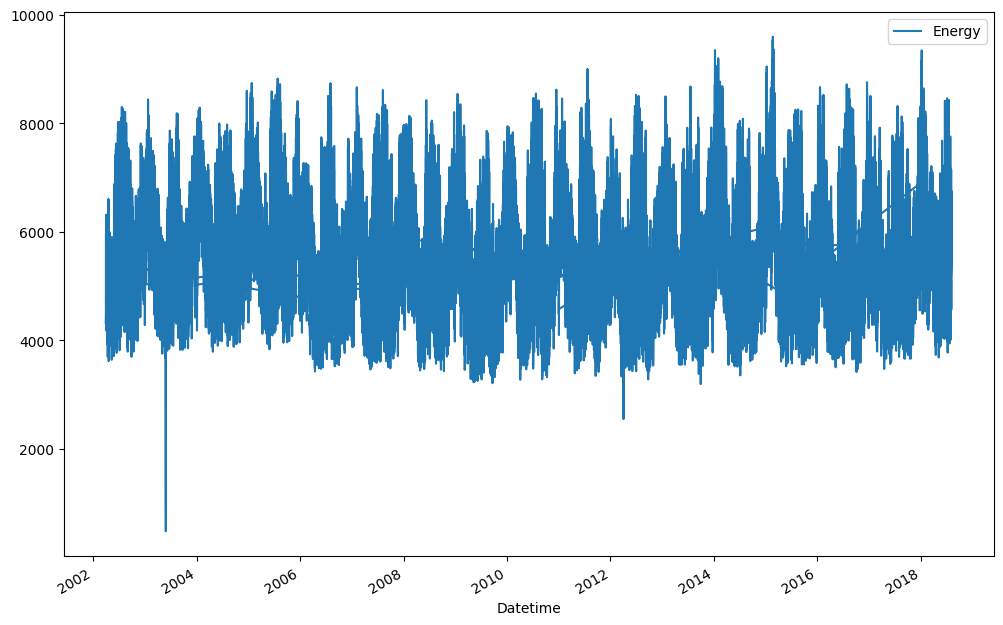

In [5]:
df.columns = ['Energy']
df.plot(figsize=(12,8))

In [6]:
daily_data = df.resample(rule='D').mean()
daily_data = daily_data.asfreq('D')

In [7]:
daily_data

,Energy
Datetime,
2002-04-01,5271.173913
2002-04-02,5310.416667
2002-04-03,5325.916667
2002-04-04,5670.791667
2002-04-05,5686.125000
...,...
2018-07-30,5492.708333
2018-07-31,5660.750000
2018-08-01,5959.708333


In [8]:
daily_data1=daily_data.copy()

In [9]:
daily_data['energy_1dayback']=daily_data['Energy'].shift(+1)
daily_data['energy_2dayback']=daily_data['Energy'].shift(+2)
daily_data['energy_3dayback']=daily_data['Energy'].shift(+3)
daily_data['energy_4dayback']=daily_data['Energy'].shift(+4)
daily_data['energy_5dayback']=daily_data['Energy'].shift(+5)
daily_data['energy_6dayback']=daily_data['Energy'].shift(+6)
daily_data['energy_7dayback']=daily_data['Energy'].shift(+7)

daily_data.head(10)

,Energy,energy_1dayback,energy_2dayback,energy_3dayback,energy_4dayback,energy_5dayback,energy_6dayback,energy_7dayback
Datetime,,,,,,,,
2002-04-01,5271.173913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-02,5310.416667,5271.173913,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-03,5325.916667,5310.416667,5271.173913,NaN,NaN,NaN,NaN,NaN
2002-04-04,5670.791667,5325.916667,5310.416667,5271.173913,NaN,NaN,NaN,NaN
2002-04-05,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913,NaN,NaN,NaN
2002-04-06,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913,NaN,NaN
2002-04-07,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913,NaN
2002-04-08,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913
2002-04-09,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667


In [10]:
daily_data=daily_data.dropna()
daily_data

,Energy,energy_1dayback,energy_2dayback,energy_3dayback,energy_4dayback,energy_5dayback,energy_6dayback,energy_7dayback
Datetime,,,,,,,,
2002-04-08,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667,5271.173913
2002-04-09,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667,5310.416667
2002-04-10,5171.666667,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667,5325.916667
2002-04-11,5207.875000,5171.666667,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000,5670.791667
2002-04-12,5090.416667,5207.875000,5171.666667,5136.083333,5283.875000,5060.652174,5367.791667,5686.125000
...,...,...,...,...,...,...,...,...
2018-07-30,5492.708333,5293.833333,5485.791667,5978.750000,6216.458333,6036.208333,6142.666667,5900.041667
2018-07-31,5660.750000,5492.708333,5293.833333,5485.791667,5978.750000,6216.458333,6036.208333,6142.666667
2018-08-01,5959.708333,5660.750000,5492.708333,5293.833333,5485.791667,5978.750000,6216.458333,6036.208333


In [11]:
daily_data1.to_csv('dataset_daily.csv')

In [12]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,y=daily_data['energy_1dayback'],daily_data['energy_2dayback'],daily_data['energy_3dayback'],daily_data['energy_4dayback'],daily_data['energy_5dayback'],daily_data['energy_6dayback'],daily_data['energy_7dayback'],daily_data['Energy']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[5060.65217391 5367.79166667 5686.125      ... 5325.91666667
  5310.41666667 5271.17391304]
 [5283.875      5060.65217391 5367.79166667 ... 5670.79166667
  5325.91666667 5310.41666667]
 [5136.08333333 5283.875      5060.65217391 ... 5686.125
  5670.79166667 5325.91666667]
 ...
 [5660.75       5492.70833333 5293.83333333 ... 5978.75
  6216.45833333 6036.20833333]
 [5959.70833333 5660.75       5492.70833333 ... 5485.79166667
  5978.75       6216.45833333]
 [5805.04166667 5959.70833333 5660.75       ... 5293.83333333
  5485.79166667 5978.75      ]]


In [13]:
final_x

array([[5060.65217391, 5367.79166667, 5686.125     , ..., 5325.91666667,
        5310.41666667, 5271.17391304],
       [5283.875     , 5060.65217391, 5367.79166667, ..., 5670.79166667,
        5325.91666667, 5310.41666667],
       [5136.08333333, 5283.875     , 5060.65217391, ..., 5686.125     ,
        5670.79166667, 5325.91666667],
       ...,
       [5660.75      , 5492.70833333, 5293.83333333, ..., 5978.75      ,
        6216.45833333, 6036.20833333],
       [5959.70833333, 5660.75      , 5492.70833333, ..., 5485.79166667,
        5978.75      , 6216.45833333],
       [5805.04166667, 5959.70833333, 5660.75      , ..., 5293.83333333,
        5485.79166667, 5978.75      ]])

In [14]:
y

array([[5283.875     ],
       [5136.08333333],
       [5171.66666667],
       ...,
       [5959.70833333],
       [5805.04166667],
       [5489.        ]])

In [15]:
X_train,X_test,y_train,y_test=final_x[:-360],final_x[-360:],y[:-360],y[-360:]


LR, RF and XGB Model

In [16]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [17]:
from sklearn.ensemble import RandomForestRegressor
ran_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [18]:
ran_model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

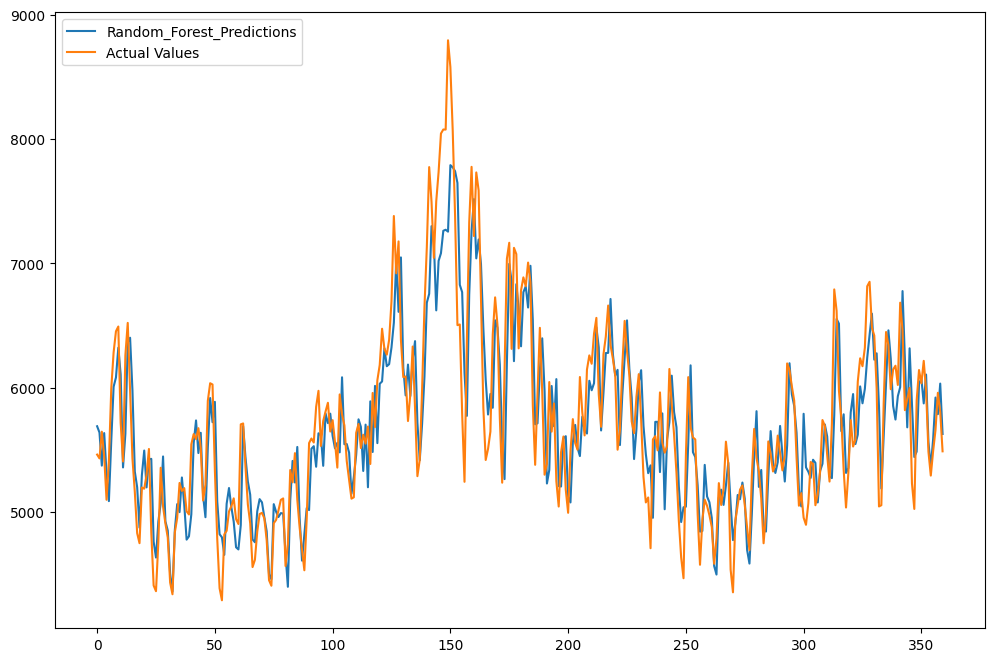

In [19]:
ran_pred=ran_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(ran_pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Values')
plt.legend(loc="upper left")
plt.show()

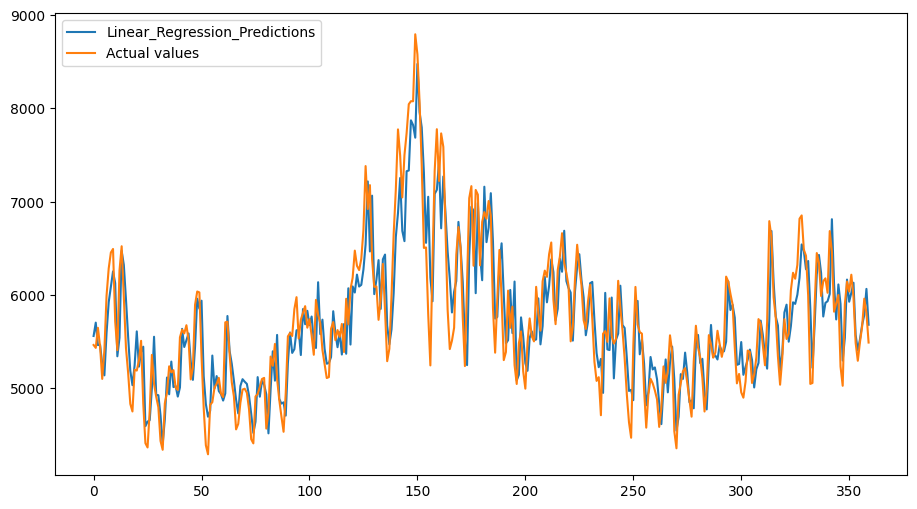

In [20]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()

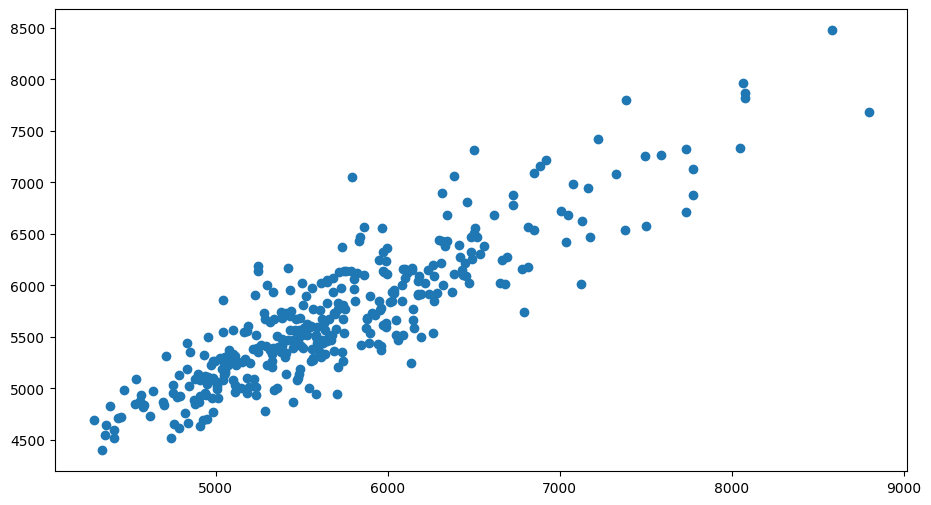

In [21]:
plt.scatter(y_test,lin_pred)

In [22]:
residual = y_test-lin_pred

/tmp/ipython-input-24-1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

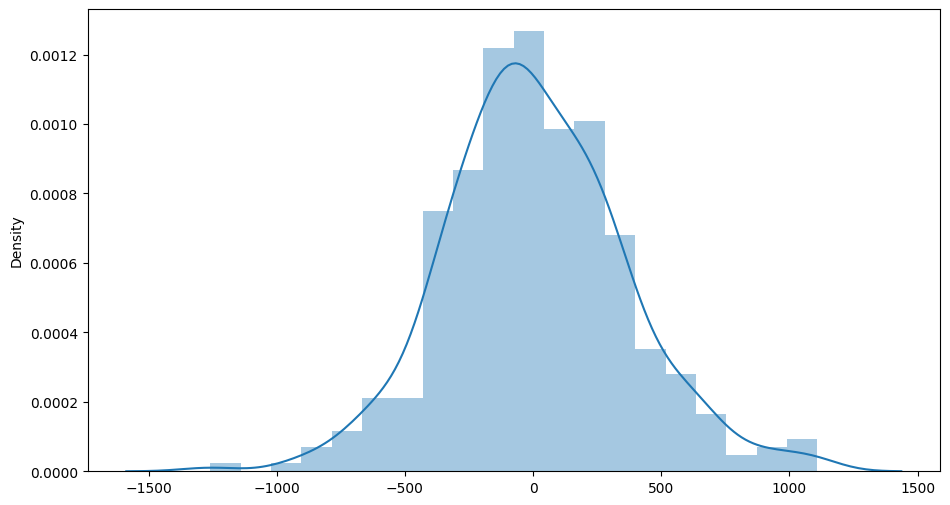

In [ ]:
sns.distplot(residual)

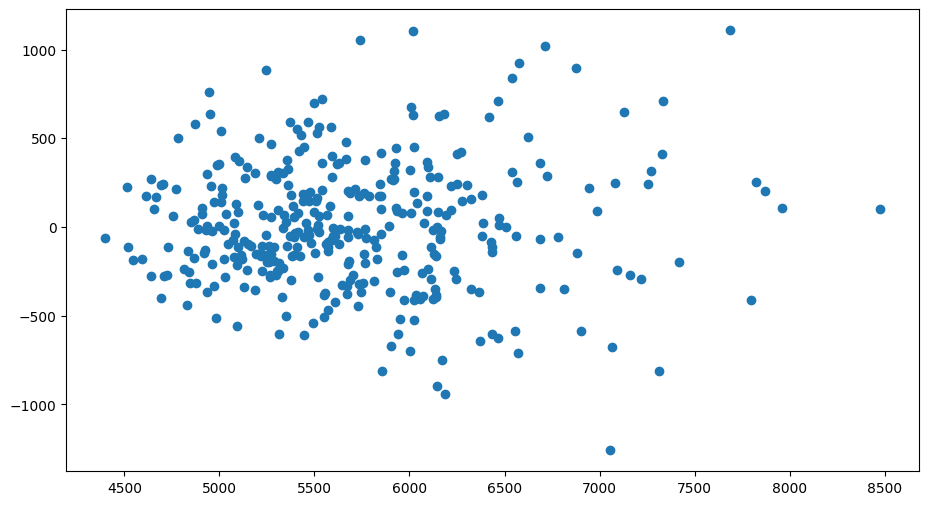

In [23]:
plt.scatter(lin_pred,residual)

In [24]:
from xgboost import XGBRegressor

In [25]:
xg_model = XGBRegressor()

In [26]:
xg_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
predictions = xg_model.predict(X_test)

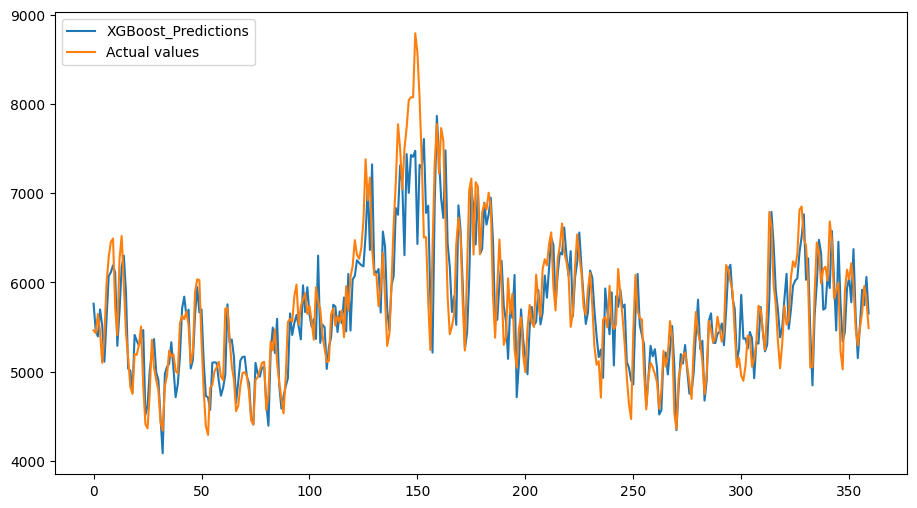

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(predictions,label='XGBoost_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()

Calculate the RMSE,MAPE and MAE

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error
from math import sqrt

RMSE_RF=sqrt(mean_squared_error(ran_pred,y_test))
RMSE_LR=sqrt(mean_squared_error(lin_pred,y_test))
MAE_RF = mean_absolute_error(ran_pred,y_test)
MAE_LR = mean_absolute_error(lin_pred,y_test)
MAPE_RF = round((mean_absolute_percentage_error(ran_pred,y_test)*100),3)
MAPE_LR = round((mean_absolute_percentage_error(lin_pred,y_test)*100),3)
MAE_XG = mean_absolute_error(y_test, predictions)
MAPE_XG= round((mean_absolute_percentage_error(y_test,predictions)*100),3)
RMSE_xg=sqrt(mean_squared_error(predictions,y_test))

In [30]:
print('RMSE for Random Forest Model is:',RMSE_RF)
print('MAE for Random Forest Model is:',MAE_RF)
print('MAPE for Random Forest Model is:',MAPE_RF)

RMSE for Random Forest Model is: 367.76353121286826
MAE for Random Forest Model is: 284.64962469404173
MAPE for Random Forest Model is: 4.909


In [31]:
print('RMSE for Linear Regression Model is:',RMSE_LR)
print('MAE for Linear Regression Model is:',MAE_LR)
print('MAPE for Linear Regression Model is:',MAPE_LR)

RMSE for Linear Regression Model is: 354.21587684143503
MAE for Linear Regression Model is: 274.32236827665815
MAPE for Linear Regression Model is: 4.767


In [32]:
print('RMSE for XG Boost Model is:',RMSE_xg)
print('MAE for XG Boos Model is:',MAE_XG)
print('MAPE for XG Boos Model is:',MAPE_XG)

RMSE for XG Boost Model is: 385.0386771592365
MAE for XG Boos Model is: 284.9675315605815
MAPE for XG Boos Model is: 4.851


Calculate forecasting accuracy

1.LR Model

In [33]:
from sklearn.linear_model import LinearRegression
final_lin_model=LinearRegression()

final_lin_model.fit(final_x,y)

LinearRegression()

In [35]:
forecast_check_data = np.array(daily_data['Energy'][:'2018-07-04'][-7:])

In [36]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_lin_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-30:]

In [ ]:
future_pred_lr

array([6087.256848  , 6215.25594952, 6141.88749192, 6140.87365114,
       6521.86549747, 6673.25905396, 6625.87660329, 6130.28971342,
       6230.8299091 , 6129.53530492, 6053.52021284, 6329.60244898,
       6399.13312965, 6699.99310645, 6124.27236659, 6286.28609134,
       6114.81197159, 6006.42612966, 6271.59221683, 6065.95189256,
       6764.02781189, 6016.5050244 , 6388.33177526, 6089.12391788,
       5943.8187856 , 6371.23695467, 5658.93549362, 6915.17195455,
       5748.27741888, 6556.91468212])

In [37]:
future_chk = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df = pd.DataFrame(index=future_chk)

In [38]:
future_chk_df['future_chk_energy'] = future_pred_lr.tolist()

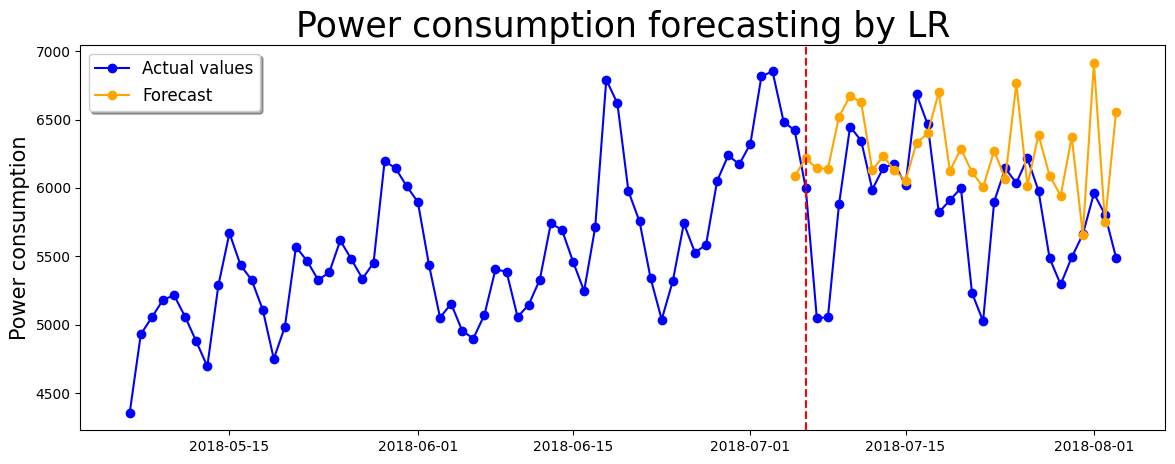

In [39]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by LR", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df.index,future_chk_df.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [40]:
daily_data_last_30 = daily_data['Energy'].tail(30)

In [41]:
MAE_check = mean_absolute_error(daily_data_last_30, future_chk_df)
MAPE_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df)*100),3)
RMSE_check=sqrt(mean_squared_error(future_chk_df,daily_data_last_30))

In [42]:
print('RMSE for forecast check is:',RMSE_check)
print('MAE for forecast check is:',MAE_check)
print('MAPE for forecast check is:',MAPE_check)

RMSE for forecast check is: 588.3044021351931
MAE for forecast check is: 461.73366509129835
MAPE for forecast check is: 8.253


2.RF Model

In [43]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [44]:
final_RF_model.fit(final_x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=3, random_state=1)

In [45]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    rf_f_chk=final_RF_model.predict(ck)
    z=np.append(z,rf_f_chk)
    i=+1
future_pred_RF=z[-30:]

In [46]:
future_pred_RF

array([5955.12958333, 6127.81291667, 6049.80958333, 6259.63125   ,
       6605.73125   , 6762.69416667, 6455.16541667, 6005.48916667,
       6298.92458333, 5951.36666667, 6033.96      , 6356.44583333,
       6663.80791667, 6524.87875   , 5827.28083333, 6276.92708333,
       5894.89333333, 5968.71012681, 6199.98958333, 6591.72708333,
       6610.77666667, 5761.93958333, 6392.07916667, 5731.01833333,
       6073.0675    , 5988.04791667, 6466.855     , 6612.29583333,
       5685.25333333, 6506.35666667])

In [47]:
future_chk_rf = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_rf = pd.DataFrame(index=future_chk_rf)
future_chk_df_rf['future_chk_energy'] = future_pred_RF.tolist()

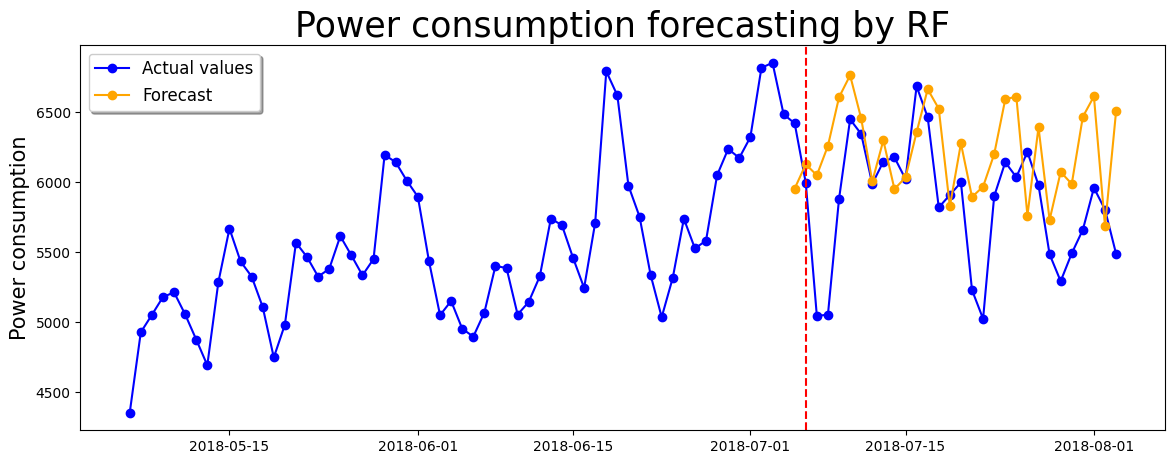

In [48]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by RF", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df_rf.index,future_chk_df_rf.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df_rf.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [49]:
MAE_rf_check = mean_absolute_error(daily_data_last_30, future_chk_df_rf)
MAPE_rf_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df_rf)*100),3)
RMSE_rf_check=sqrt(mean_squared_error(future_chk_df_rf,daily_data_last_30))
print('RMSE for RF forecast check is:',RMSE_rf_check)
print('MAE for RF forecast check is:',MAE_rf_check)
print('MAPE for RF forecast check is:',MAPE_rf_check)

RMSE for RF forecast check is: 562.7060390106095
MAE for RF forecast check is: 462.2925042270528
MAPE for RF forecast check is: 8.215


3.XGB Model

In [50]:
from xgboost import XGBRegressor
final_xg_model = XGBRegressor()
final_xg_model.fit(final_x,y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    xgb_f_chk=final_xg_model.predict(ck)
    z=np.append(z,xgb_f_chk)
    i=+1
future_pred_XGB=z[-30:]

In [52]:
future_pred_XGB

array([6071.85400391, 6020.11328125, 6055.90576172, 6099.63183594,
       6715.90771484, 6763.91894531, 6648.25585938, 6054.85791016,
       5981.01416016, 6193.33886719, 5803.546875  , 6515.45458984,
       6173.390625  , 6541.20068359, 5999.04736328, 5845.48486328,
       6017.26416016, 5407.77148438, 6685.75830078, 5591.92675781,
       6566.13964844, 5366.44384766, 5695.79052734, 5902.23095703,
       5184.39648438, 6850.59082031, 5416.39501953, 6937.72949219,
       5009.90039062, 5429.08496094])

In [53]:
future_chk_xgb = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_xgb = pd.DataFrame(index=future_chk_xgb)
future_chk_df_xgb['future_chk_energy'] = future_pred_XGB.tolist()

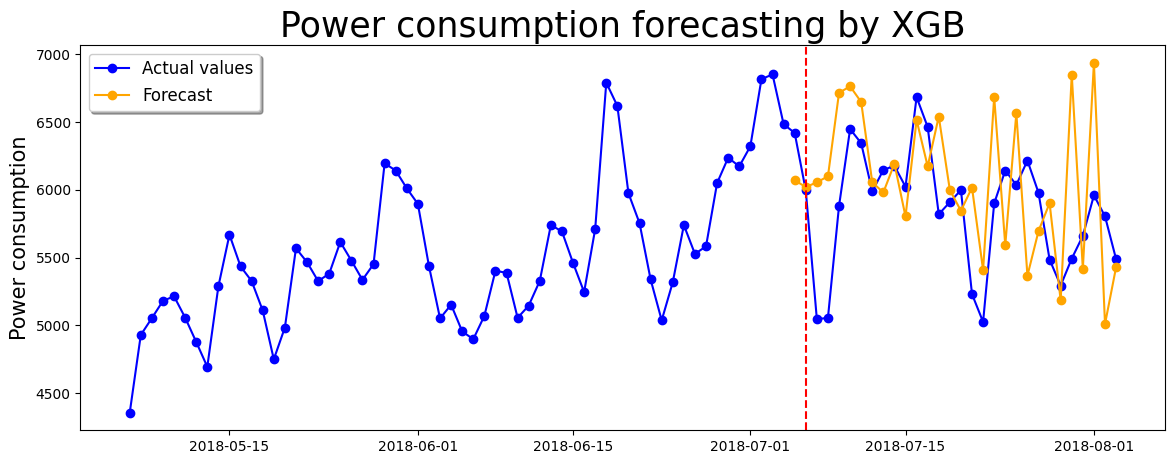

In [54]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by XGB", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df_xgb.index,future_chk_df_xgb.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df_xgb.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [55]:
MAE_xgb_check = mean_absolute_error(daily_data_last_30, future_chk_df_xgb)
MAPE_xgb_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df_xgb)*100),3)
RMSE_xgb_check=sqrt(mean_squared_error(future_chk_df_xgb,daily_data_last_30))
print('RMSE for XGB forecast check is:',RMSE_xgb_check)
print('MAE for XGB forecast check is:',MAE_xgb_check)
print('MAPE for XGB forecast check is:',MAPE_xgb_check)

RMSE for XGB forecast check is: 586.4270672363825
MAE for XGB forecast check is: 463.3784993489584
MAPE for XGB forecast check is: 8.119


Forecast

In [56]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [57]:
final_RF_model.fit(final_x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=3, random_state=1)

In [58]:
daily_data_last_7 = np.array(daily_data['Energy'].tail(7))
daily_data_last_7

array([5485.79166667, 5293.83333333, 5492.70833333, 5660.75      ,
       5959.70833333, 5805.04166667, 5489.        ])

In [59]:
np.savetxt("daily_data_last_7.csv", daily_data_last_7, delimiter=",")

In [60]:
z=daily_data_last_7

for i in range(0,30):
    r=z[-7:]
    r=np.array([r])
    ranf_f=final_RF_model.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]

In [61]:
future_pred

array([5796.16375   , 5237.02791667, 5548.26844203, 5524.37166667,
       5838.16916667, 5788.9075    , 5529.37583333, 5998.18      ,
       5228.94791667, 5750.62666667, 5395.71333333, 5721.345     ,
       5811.97083333, 5569.19880435, 6003.07166667, 5272.68842391,
       5854.675     , 5330.88      , 5609.4725    , 5816.46625   ,
       5581.89083333, 6035.16458333, 5267.57791667, 5947.15666667,
       5291.50333333, 5567.25125   , 5775.54791667, 5580.3525    ,
       6018.44708333, 5234.96875   ])

In [62]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [63]:
future_df['future_energy'] = future_pred.tolist()

In [64]:
print(future_df)

            future_energy
2018-08-04    5796.163750
2018-08-05    5237.027917
2018-08-06    5548.268442
2018-08-07    5524.371667
2018-08-08    5838.169167
2018-08-09    5788.907500
2018-08-10    5529.375833
2018-08-11    5998.180000
2018-08-12    5228.947917
2018-08-13    5750.626667
2018-08-14    5395.713333
2018-08-15    5721.345000
2018-08-16    5811.970833
2018-08-17    5569.198804
2018-08-18    6003.071667
2018-08-19    5272.688424
2018-08-20    5854.675000
2018-08-21    5330.880000
2018-08-22    5609.472500
2018-08-23    5816.466250
2018-08-24    5581.890833
2018-08-25    6035.164583
2018-08-26    5267.577917
2018-08-27    5947.156667
2018-08-28    5291.503333
2018-08-29    5567.251250
2018-08-30    5775.547917
2018-08-31    5580.352500
2018-09-01    6018.447083
2018-09-02    5234.968750


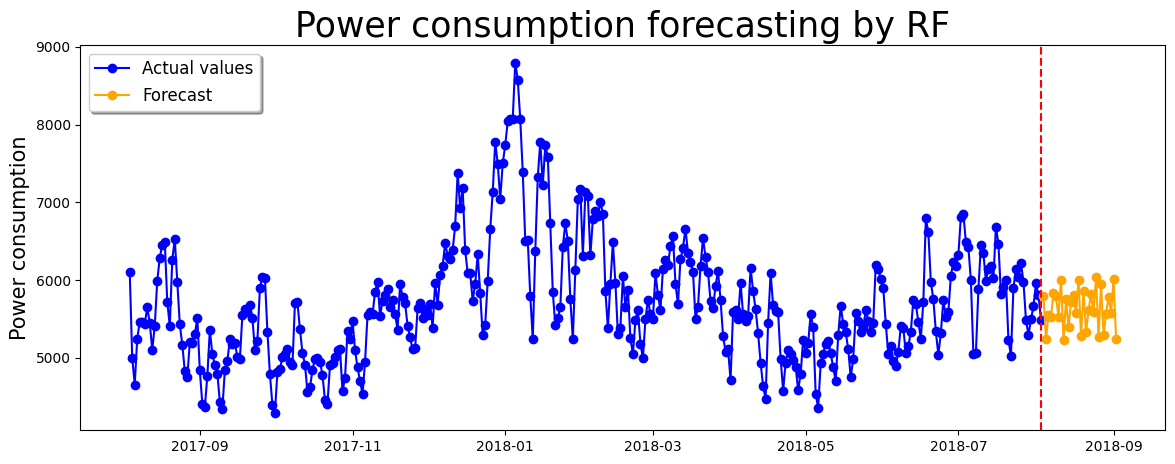

In [65]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by RF", fontsize=25)

plt.plot(daily_data1[-365:].index,daily_data1[-365:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_df.index,future_df.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(daily_data1.index[-1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

Saving the model

In [66]:
!pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=37d2c578b3273c9cf1eef2e3b3e34856d9a9511764cd2c143ac01eb4eea7571a
  Stored in directory: /root/.cache/pip/wheels/d0/9c/0d/8709be17c02b72bf04ea60d8ec64fc46a1554c0fb81e048dd6
Successfully built pickle-mixin


In [67]:
import pickle

In [68]:
filename = 'final_rf_model.pkl'
pickle.dump(final_RF_model, open(filename,'wb'))

In [69]:
pickled_model=pickle.load(open('final_rf_model.pkl','rb'))

In [70]:
pk=pickled_model.predict(X_test)